In [1]:
import pandas as pd
import numpy as np
import csv

train = pd.read_csv("https://raw.githubusercontent.com/beneyoung/KBDB---Team-Wine_quality/main/Wine_quality/train.csv")
#test = pd.read_csv()


#EDA

In [2]:
#결측치 갯수 출력
print(f"train.csv 결측치: \n {train.isnull().sum()}\n ")

train.shape

train.csv 결측치: 
 index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64
 


(5497, 14)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [4]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


index 구분자  
***quality 품질(타겟 변수)***  
fixed acidity 산도  
volatile acidity 휘발성산  
citric acid 시트르산  
residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분  
chlorides 염화물  
free sulfur dioxide 독립 이산화황  
total sulfur dioxide 총 이산화황  
density 밀도  
pH 수소이온농도  
sulphates 황산염  
alcohol 도수  
type 종류  

In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
# 시각화에 필요한 라이브러리를 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 쥬피터노트에서 결과를 출력하도록 설정
%matplotlib inline

# 글꼴 설정
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


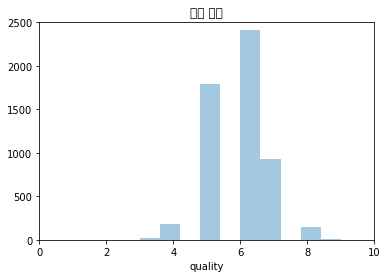

In [7]:
# 타깃 변수(quality) 분포 시각화
sns.distplot(train['quality'], kde=False, bins=10)
plt.axis([0, 10, 0, 2500]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("와인 품질") # 그래프 제목
plt.show()

#전처리

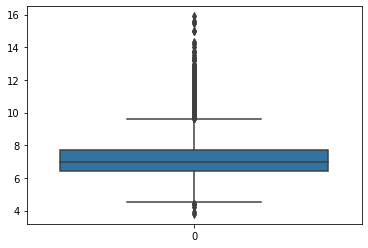

In [8]:
#'fixed acidity' 이상치 확인

sns.boxplot(data=train['fixed acidity'])

In [9]:
#"fixed acidity"가 25%인 값
quantile_25 = np.quantile(train['fixed acidity'], 0.25)

#"fixed acidity"가 75%인 값
quantile_75 = np.quantile(train['fixed acidity'],0.75)

#quantile_75와 quantile_25의 차이
IQR = quantile_75 - quantile_25

#quantile_25보다 1.5 * IQR 작은 값
minimum = quantile_25 - 1.5 * IQR

#quantile_75보다 1.5 * IQR 큰 값
maximum = quantile_75 + 1.5 * IQR

In [10]:
#"fixed acidity"가 minimum보다 크고, maximum보다 작은 값
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

train2.shape

(5203, 14)

In [11]:
#294개의 이상치 제거
train.shape[0] - train2.shape[0]

294

In [12]:
train["fixed acidity"].describe()

count    5497.000000
mean        7.210115
std         1.287579
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

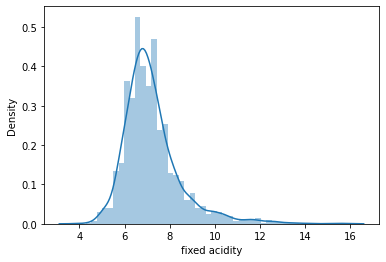

In [13]:
#"fixed acidity"의 distplot
sns.distplot(train['fixed acidity'])

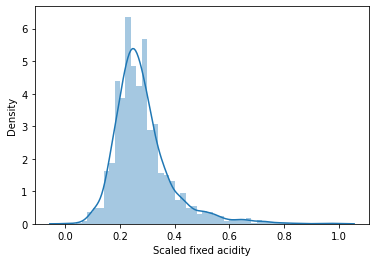

In [14]:
#스케일링 하지 말기로 했었나
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])

# train과 test의 "fixed acidity"를 스케일링 하여 "Scaled fixed acidity"라는 column에 저장
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
#test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

#"Scaled fixed acidity"의 distplot
sns.distplot(train['Scaled fixed acidity'])

In [15]:
#원핫인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(train[['type']])  #encoder로 train의 type 학습


#encoder로 train의 type은 onehot에, test의 type은 onehot2에 저장 후 array>dataframe으로 변환
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
#onethot2 = pd.DataFrame(encoder.fit_transform(test[['type']]).toarray(), columns = encoder.get_feature_names())

#onehot(2)를 원본데이터에 각각 병합해준 후 type 컬럼 제거
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type']) 
#test = pd.concat([test, onehot2], axis = 1).drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


#모델링

In [16]:
#타겟 특성의 최빈값과 그 빈도
train["quality"].value_counts()
#imbalance한 클래스 비율

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [22]:
#랜덤포레스트로 학습
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier()

X = train.drop(columns = ['quality'])
y = train['quality']

#학습
random_classifier.fit(X,y)

RandomForestClassifier()

In [18]:
#훈련세트의 크기가 크지 않다고 판단해 k-fold 교차검증

X = train.drop(columns = ['index','quality'])
y = train['quality']

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [19]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 0)
valid_scores = []
test_predictions = []

#학습-검증 분리
for train_idx, valid_idx in kf.split(X,y) : 
  X_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

#모델 학습
for train_idx, valid_idx in kf.split(X,y) : 
  X_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_train, y_train)

In [20]:
#결과 예측

for train_idx, valid_idx in kf.split(X,y) : 
  X_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_train, y_train)
  
  valid_prediction = model.predict(X_val)

In [21]:
#평균 점수 예측
from sklearn.metrics import accuracy_score

for train_idx, valid_idx in kf.split(X,y) : 
  X_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_train, y_train)
  
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_scores))

0.69
0.6663636363636364
0.6569608735213831
0.6760691537761602
0.6715195632393085
평균 점수 :  0.6721826453800976
